### 2. Análisis Exploratorio de Datos

Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati

Importa las librerías necesarias para trabajar en la consigna.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [83]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [84]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


**Tamaño del DataSet**

In [85]:
data.shape
#El primer numero corresponde a las filas mientras que el segundo son las columnas

(146660, 19)

Tipos de variables:

In [86]:
data.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [21]:
data["l1"].unique()

array(['Argentina'], dtype=object)

In [22]:
data["operation_type"].unique()

array(['Venta'], dtype=object)

In [23]:
data["currency"].unique()

array(['USD'], dtype=object)

Al visualizar de manera rapida las columnas del dataset podemos decir que algunas variables resultan mas relevantes que otras para el problema planteado. Por ejemplo, `lat` y `lon` son dos variables que si bien nos permiten conocer el lugar en donde se encuentra ubicada la propiedad puede individualizar los datos al igual que `description`,`title`, `start_date` y `end_date`.
Por otro lado, en la variable `l1` observamos un solo valor ('Argentina'), al igual que`operation_type` ('Venta') y `currency` ('USD') , es por eso que se procedera a eliminarlas ya que no aportan informacion relevante al modelo.

In [69]:
data.drop(["lat", "lon","description","title", "start_date", "end_date","operation_type", "currency"], axis=1, inplace=True)

**Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset?

Cantidad de tipos de propiedades publicados

In [43]:
len(data["property_type"].value_counts())

10

In [44]:
data["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Mostramos la cantidad de instancias en relacion al tipo de propiedad

Text(0.5, 1.0, 'Cantidad de propiedades')

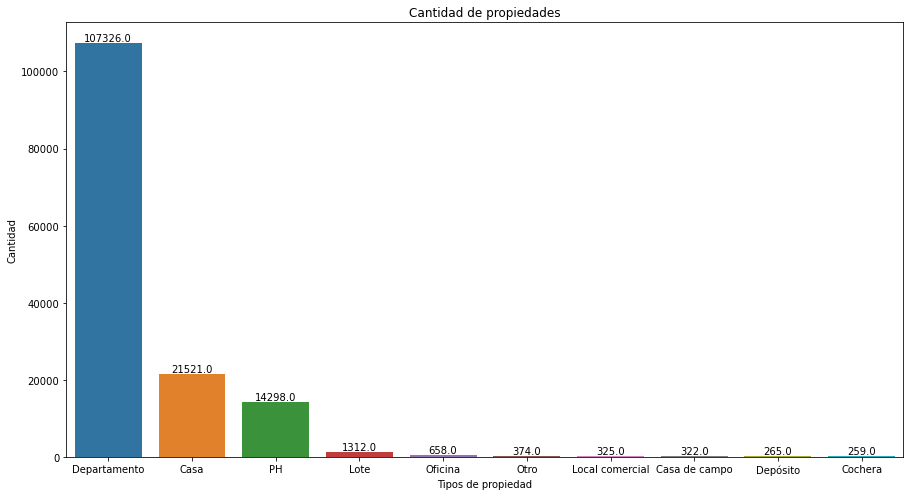

In [27]:
plt.figure(figsize=(15,8))
barras = sns.countplot(data=data, x="property_type",  order = data['property_type'].value_counts().index)
for p in barras.patches:
    barras.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.xlabel('Tipos de propiedad')
plt.ylabel('Cantidad')
plt.title('Cantidad de propiedades')

In [87]:
#Observamos los porcentajes de publicaciones por tipo de propiedad
data['property_type'].value_counts()/len(data.property_type)

Departamento       0.731801
Casa               0.146741
PH                 0.097491
Lote               0.008946
Oficina            0.004487
Otro               0.002550
Local comercial    0.002216
Casa de campo      0.002196
Depósito           0.001807
Cochera            0.001766
Name: property_type, dtype: float64

En el grafico anterior podemos observar que la mayor cantidad de publicaciones se distribuyen en los tipos de propiedad: Departamento, Casa y PH. Es por esto que para simplificar el analisis agruparemos el resto de las propiedades en nuevo grupo llamado Otros.

In [ ]:
#AGRUPAR LOS TIPOS DE PROPIEDAD MAS PEQUEÑOS EN OTROS

Los graficos a continuacion muestran las cantidad de propiedades publicadas segun la Region geografica (`l2`) y las 15 localidades mas frecuentes (`l3`)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Palermo'),
  Text(1, 0, 'Tigre'),
  Text(2, 0, 'Almagro'),
  Text(3, 0, 'Belgrano'),
  Text(4, 0, 'Caballito'),
  Text(5, 0, 'Villa Crespo'),
  Text(6, 0, 'Recoleta'),
  Text(7, 0, 'La Plata'),
  Text(8, 0, 'La Matanza'),
  Text(9, 0, 'Pilar'),
  Text(10, 0, 'Lomas de Zamora'),
  Text(11, 0, 'Villa Urquiza'),
  Text(12, 0, 'Vicente López'),
  Text(13, 0, 'Tres de Febrero'),
  Text(14, 0, 'Barrio Norte')])

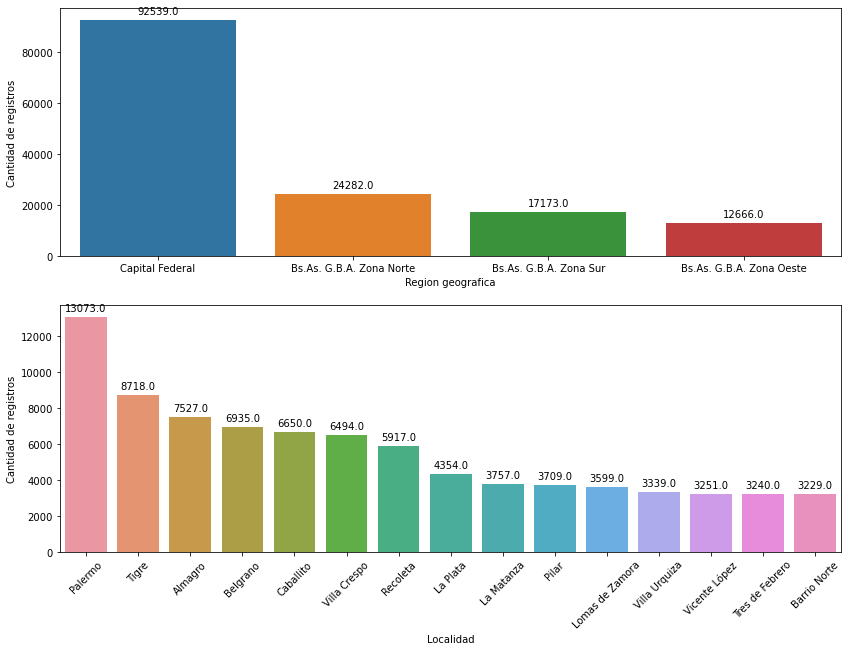

In [45]:
f, axes = plt.subplots(2, 1,figsize=(14,10))

region_geo= sns.countplot(data=data, x="l2", orient = "v", order=data["l2"].value_counts().index, ax=axes[0])
for p in region_geo.patches:
    region_geo.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
region_geo.set_xlabel("Region geografica")
region_geo.set_ylabel("Cantidad de registros")

localidad= sns.countplot(data=data, x="l3", orient = "v", order=data["l3"].value_counts().head(15).index, ax=axes[1])
for p in localidad.patches:
    localidad.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
localidad.set_xlabel("Localidad")
localidad.set_ylabel("Cantidad de registros")

plt.xticks(rotation=45)

En terminos de Region geografica la mayor cantidad de publicaciones se concentran en Capital Federal, mientras que las 5 localidades mas frecuentes son: Palermo, Tigre, Almagro, Belgrano y Caballito.

In [70]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Con el cuadro presentado anteriormente podemos observar que las variables *Precio* y *Superficie* tiene una desviacion estandar muy grande, lo que significa que sus valores estan muy dispersos, ademas, existe una gran diferencia entre los valores minimos y maximos. Esto puede generar inconvientes a la hora de predecir los precios para las distintas propiedades. 

**Valores Atipicos (Outliers)**

Analizaremos en un primer momento la variable superficie total relacionada con los barrios 15 barrios mas publicados:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Palermo'),
  Text(1, 0, 'La Plata'),
  Text(2, 0, 'Villa Crespo'),
  Text(3, 0, 'Pilar'),
  Text(4, 0, 'Tigre'),
  Text(5, 0, 'Almagro'),
  Text(6, 0, 'Belgrano'),
  Text(7, 0, 'Recoleta'),
  Text(8, 0, 'Caballito'),
  Text(9, 0, 'La Matanza'),
  Text(10, 0, 'Barrio Norte'),
  Text(11, 0, 'Villa Urquiza'),
  Text(12, 0, 'Vicente López'),
  Text(13, 0, 'Tres de Febrero'),
  Text(14, 0, 'Lomas de Zamora')])

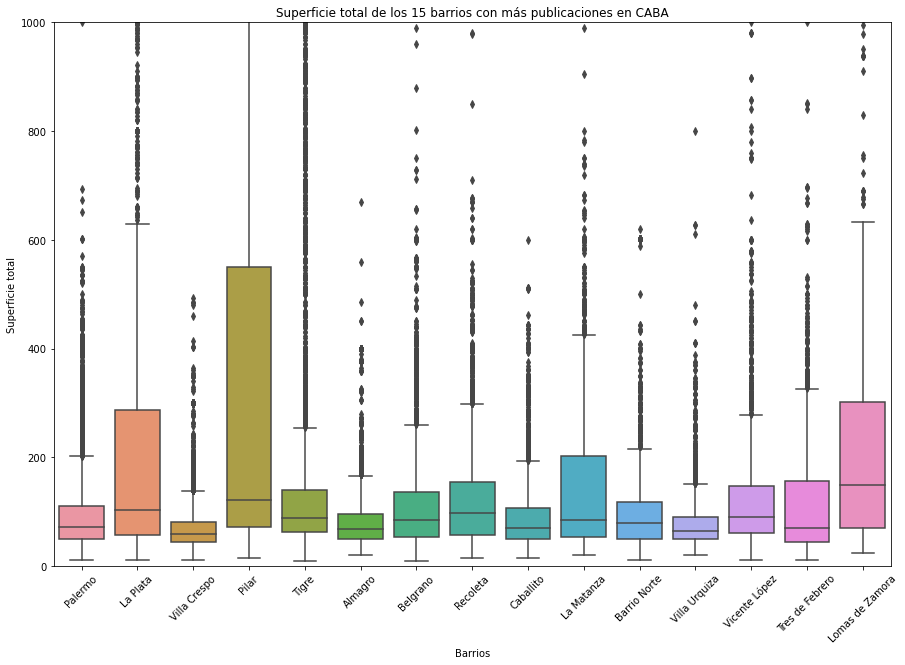

In [13]:
barrios= data["l3"].value_counts()[:15].index

plt.figure(figsize=(15, 10))
sns.boxplot(data = data[data["l3"].isin(barrios)], x = "l3", y = "surface_total")

plt.title("Superficie total de los 15 barrios con más publicaciones en CABA")
plt.xlabel("Barrios")
plt.ylabel("Superficie total")
plt.ylim(0, 1000)
plt.xticks(rotation=45)

Como se pueden observar en el grafico, las colas de los boxplot son muy largas, esto nos da la pauta de que existe una gran cantidad de valores atipicos que pueden sesgar nuestros modelos.

Luego analizamos como se comportan los precios en funcion a los tipos de propiedades y a las localidades mas frecuentes:

Text(0.5, 1.0, 'Relacion tipo de propiedad y precio')

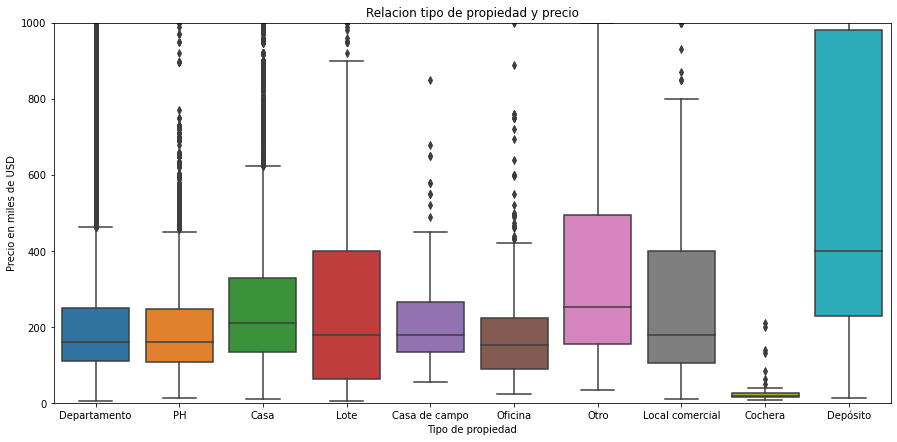

In [16]:
plt.figure(figsize=(15,7))
grafico_pro = sns.boxplot(y=(data.price/1000), x=data.property_type)
grafico_pro.set(ylim=(0, 1000))
grafico_pro.set_xlabel("Tipo de propiedad")
grafico_pro.set_ylabel("Precio en miles de USD")
grafico_pro.set_title("Relacion tipo de propiedad y precio")


Text(0.5, 1.0, 'Relacion localidades y precio')

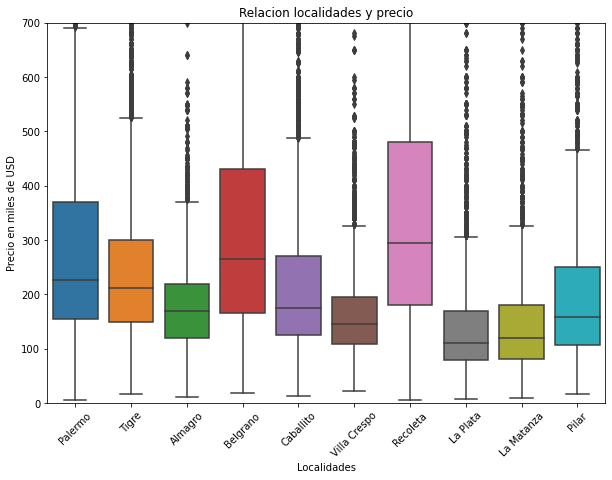

In [18]:
plt.figure(figsize=(10,7))
grafico_l3 = sns.boxplot(y=(data.price/1000), x=data.l3, order=data.l3.value_counts().head(15).index)
grafico_l3.set(ylim=(0, 700))

plt.xticks(rotation=45)

plt.xlabel("Localidades")
plt.ylabel("Precio en miles de USD")
plt.title("Relacion localidades y precio")

Al igual que para Superficie Total, existen outliers que pueden comprometer el estudio de estas variables y sesgarlas es por eso que procederemos a eliminarlas.

El metodo que utilizaremos seran los *Rangos Intercuartilicos*, que nos permitira quedarnos con el 99.3% de los valores y elimanar aquellos que esten fuera de este porcentaje. 
Aplicaremos la misma metodologia tanto para `price` como para `surface_total`.

In [71]:
#Eliminamos outliers de la varibale Superficie Total
q1, q3 = data['surface_total'].quantile(0.25), data['surface_total'].quantile(0.75)
IQR = q3 - q1

upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR 

data= data[(data.surface_total > lower) & (data.surface_total < upper)]

Ademas es importante tener en cuenta que los valores de Superficie Cubierta no pueden ser mayores que Superficie Total, pero eso agregaremos un filtro que elimine aquellos valores que no cumplan con esta condicion:

In [72]:
data= data[data["surface_covered"] <= data["surface_total"]]

In [73]:
#Eliminamos outliers para la variable Precio
q1, q3 = data['price'].quantile(0.25), data['price'].quantile(0.75)
IQR_price = q3 - q1

upper_price = q3 + 1.5 * IQR_price
lower_price = q1 - 1.5 * IQR_price

data = data[(data.price > lower_price) & (data.price < upper_price)]

**Valores Faltantes**: Imprimimos en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [74]:
data_filtrada.isnull().sum()/len(data)

created_on         0.000000
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.013499
surface_total      0.000000
surface_covered    0.000000
price              0.000000
property_type      0.000000
dtype: float64

In [45]:
#Tipo de propiedades publicadas
data["property_type"].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

Como se muestra en la celda anterior, solo existe 1 variable con datos faltantes:`bathrooms`. El faltante de estos valores puede deberse a distintas razones.
Por ejemplo, en este caso, puede deberse al tipos de propiedad como cocheras y lotes (los cuales no poseen baños) esto no significa que falten valores si no que su valor es 0. 

In [75]:
#Llenamos los valores faltantes con el numero 0
data.bathrooms.fillna(0, inplace=True)

In [81]:
#Corroboramos que no haya faltantes
data.isnull().sum()/len(data)

created_on         0.0
l1                 0.0
l2                 0.0
l3                 0.0
rooms              0.0
bedrooms           0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
property_type      0.0
dtype: float64

**Discretizacion de variables**

Para poder hacer uso de las varibles categoricas en nuestros algoritmos, vamos a discretizar las mismas, es decir, pasar estos datos a numeros para que sean mas interpretables para nuestros modelos

In [77]:
#Importamos OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
tipo_propiedad = ["Departamento", "PH", "Casa"]
enc = preprocessing.OneHotEncoder(categories=tipo_propiedad)
X = [[""], ['female', 'from Europe', 'uses Firefox']]

In [51]:
#Visualizamos los resultados
data.property_type.head()

AttributeError: 'DataFrame' object has no attribute 'property_type'

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Estudio de la distribución y las relaciones de las variables: `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad.

Observaremos los datos mas relevantes para tener una primera impresion de estas variables

In [ ]:
data.describe()

Con el cuadro presentado anteriormente podemos observar que las variables *Precio* y *Superficie* tiene una desviacion estandar muy grande, lo que significa que sus valores estan muy dispersos, ademas, existe una gran diferencia entre los valores minimos y maximos. Esto puede generar inconvientes a la hora de predecir los precios para las distintas propiedades. 

Analizaremos en un primer momento la variable Superficie Total en relacion con los 15 barrios mas publicados.


In [ ]:
barrios= data["l3"].value_counts()[:15].index

plt.figure(figsize=(15, 10))
sns.boxplot(data = data[data["l3"].isin(barrios)], x = "l3", y = "surface_total")

plt.title("Superficie total de los 15 barrios con más publicaciones en CABA")
plt.xlabel("Barrios")
plt.ylabel("Superficie total")
plt.ylim(0, 1000)
plt.xticks(rotation=45)

Como se pueden observar en en grafico, las colas de los boxplot son muy largas, esto nos da la pauta de que existe una gran cantidad de valores atipicos que pueden sesgar la aplicacion del modelo.

A continuacion, con los siguientes graficos veremos como se comportan los precios en funcion a los tipos de propiedades, cantidad de habitaciones y localidades mas frecuentes:

In [ ]:
plt.figure(figsize=(7,7))
grafico_pro = sns.boxplot(y=(data.price/1000), x=data.property_type)
grafico_pro.set(ylim=(0, 1000))
grafico_pro.set_xlabel("Tipo de propiedad")
grafico_pro.set_ylabel("Precio en miles de USD")
grafico_pro.set_title("Relacion tipo de propiedad y precio")


In [ ]:
plt.figure(figsize=(10,7))
grafico_l3 = sns.boxplot(y=(data.price/1000), x=data.l3, order=data.l3.value_counts().head(10).index)
grafico_l3.set(ylim=(0, 700))

plt.xticks(rotation=45)

plt.xlabel("Localidades")
plt.ylabel("Precio en miles de USD")
plt.title("Relacion localidades y precio")

En el grafico anterior se busco conocer la relacion existente entre los precios de las propiedades y las 10 localidades con mas publicaciones.

In [ ]:
plt.figure(figsize=(10,7))
grafico_hab = sns.boxplot(data=data, y=(data.price/1000), x=data.rooms, order=data.rooms.value_counts().head(18).index )
grafico_hab.set(ylim=(0, 1000))

grafico_hab.set_title("Precio según cantidad de habitaciones")
grafico_hab.set_ylabel("Precio (en miles de USD)")
grafico_hab.set_xlabel("Cantidad de habitaciones")

Por ultimo en este grafico vemos la relacion entre los precios y los distintas cantidades de habitaciones.
Como conclusion, y como puedimos observar en los ultimos graficos, al igual que en la variable superficie total, existe una gran dispersion de valores (Precio) que dificultan su entendimiento y modelaje.

Por ultimo, realizaremos un pairplot filtrando las variables de interes (rooms, bedrooms, bathrooms, surface_covered, surface_total y price)

In [ ]:
sns.pairplot(data[["rooms", "bedrooms", 
                                    "bathrooms", "surface_total", 
                                    "surface_covered", "price", "property_type"]], hue = "property_type")
plt.show()

Este grafico busca representar la relacion entre las variables mas relevantes y como es la dispersion de sus datos teniendo en cuenta el tipo de propiedad (donde el azul corresponde a los departamentos, verde a las casa y naranja a los PH).

Si nos enfocamos en los graficos ubicados en la diagonal podremos percebir que tan sesgados estan los datos en funcion a la media (promedio). Por ejemplo,con respecto a la variable `price` (precio) podemos decir que las Casas poseen una distribucion normal en relacion a la media, mientras que los Departamentos y PH poseen un sesgo negativo, es decir, los valores observados son mas bajos que el promedio.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
data_corr = data_caba[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

corr = data_corr.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
           xticklabels= data_corr.columns, 
           yticklabels= data_corr.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
data_caba.shape

Mapa de precios en CABA:

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(data_caba, lat="lat", lon="lon", hover_name="property_type",
                        color="price",size="surface_total",
                        color_continuous_scale=px.colors.cyclical.Edge, size_max=8, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

En este grafico podemos observar aquellas zonas mas caras de CABA en funcion a al color con el que estan pintadas. Por ejemplo donde encontramos un tono rojo oscuro son las publicaciones de propiedades mas caras, el color azul oscuro son aquellas mas economicas.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


*Promedio del metro cuadrado para la Departamentos de la localidad de Palermo:*


In [ ]:
data_depto_palermo = data_caba[data_caba.l3.isin(["Palermo"]) & data_caba.property_type.isin(["Departamento"])]

In [ ]:
m2 = (data_depto_palermo.price)/(data_depto_palermo.surface_total)

In [ ]:
promedio_m2= m2.mean()
print("Promedio del metro cuadrado para Departamentos en Palermo es de $",promedio_m2)

*Una desventaja de este dato es que el mismo puede estar sesgado por los valores maximos y minimos tanto del precio como de la superficie total.*

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati 1.csv')
data.head()

Filtrados :

In [ ]:
#Region con mas publicaciones (Capital Federal) y los 3 tipos de propiedades mas frecuentes (Ph, Casa y Departamento)
data_filtrado= data[data.property_type.isin(["PH","Casa","Departamento"]) & data.l2.isin(["Capital Federal"])]
#Superficie total debe ser menor que 1000m2 y mayor que 15m2
data_filtrado=data_filtrado[(data_filtrado.surface_total<=1000) & (data_filtrado.surface_total>=15)]
#Precios menores que $4.000.000
data_filtrado=data_filtrado[data_filtrado.price <= 4000000]
#Seleccion de variables relevantes de estudio
data_filtrado = data_filtrado[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
#Valores nulos
data_filtrado.isna().sum()
#Elimanar datos nulos
data_filtrado= data_filtrado.dropna()

Corroboramos que se haya filtrado correctamente

In [ ]:
data_filtrado.describe()

In [ ]:
data_filtrado.shape

Modelo **Arboles de Decision**

Importamos Arboles de Decision Regresion:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Como variables predictivas se eliminaron cantidad de habitaciones (Rooms), Superficie cubierta (Surface_covered) y Precio (price). Ya que presentaban alta correlacion con otras variables y esto generaba redundancia en el modelo.

In [ ]:
X, y = data_filtrado.drop(["surface_covered","rooms","price"], axis=1), data_filtrado["price"]

Separamos el data set en conjunto de entrenamiento (Train) y conjunto de testeo (Test), donde el 70% corresponde al grupo de Train y un 30% al Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=0)

Definimos como metrica de evavluacion el RMSE (Raiz del error cuadratico medio). Este nos indica cuan cerca estan los datos observados de los valores predichos por el modelo. Dedido a que es un error, el mismo se busca minimizar, es decir, valores menores de RMSE indican un mejor ajuste. Para poder comparar los modelos ultilizaremos la misma metrica de evalucion en todos ellos.

In [ ]:
from sklearn.metrics import mean_squared_error

Evaluamos las distintas profundidades del arbol con respecto al RMSE

In [ ]:
#Definimos las lisltas vacias para los valores de RSME
lista_tree_train=[]
lista_tree_test=[]

#Definimos la lista los distintos valores de profundidad del arbol de decision
max_depths=[1,2,3,4,5,6,7,8,9,10,12,14,20]

# Generamos un loop sobre los distintos valores de profundidad del arbol
for max_depth in max_depths:
    
    #Definimos el modelo de arbol de decision
    tree=DecisionTreeRegressor(max_depth=max_depth)
    
    #Entrenamos el modelo
    tree.fit(X_train,y_train)
    
    #Predecir el modelo y calcular el RMSE de entrenamiento
    y_train_pred=tree.predict(X_train)
    rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #Predecimos el modelo y evaluamos el RMSE de evaluacion
    y_test_pred=tree.predict(X_test)
    rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #Agregamos la informacion a las listas
    lista_tree_train.append(rmse_train_tree)
    lista_tree_test.append(rmse_test_tree)
    
    #Observamos los valores obtenidos para cada max_depth
    print("RMSE Train:", rmse_train_tree)
    print("RMSE Test:", rmse_test_tree)
    
    

Graficamos la curvas de validacion para observar la profundidad del arbol ideal:

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(max_depths,lista_tree_train,"o-",label="Curva de Entrenamiento")
plt.plot(max_depths,lista_tree_test,"o-",label="Curva de Testeo")
plt.grid()
plt.legend()
plt.xlabel("Profundidad del arbol")
plt.ylabel("RMSE")

Conclusion: La profundidad del arbol optima es de 6 (con un RMSE de entrenamiento de: 175978.52 y un RMSE de testeo de 175000.03), en este punto podemos observar que si incrementamos la profundidad el RMSE de la curva de testeo comienza a ser mayor que el de entrenamiento y mientras el segundo continua decreciendo el primero comienza a estabilizarse. 

Modelo **K-vecinos mas cercanos**

Separamos nuevamente nuestras variables predictivas y target:

In [ ]:
X, y = data_filtrado.drop(["surface_covered","rooms","price"], axis=1), data_filtrado["price"]

Importamos el modelo:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Evaluamos el numero de vecinos optimo:

In [ ]:
#Definimos las lisltas vacias para los valores de RSME
lista_knn_train=[]
lista_knn_test=[]

#Definimos la lista los distintas cantidades de vecinos
n_neighbors=[1,2,3,4,5,6,7,8,9,10,12,14,20]

# Generamos un loop sobre los distintos valores
for n_neighbors in n_neighbors:
    
    #Definimos el modelo de k-vecinos mas cercanos
    knn = KNeighborsRegressor(n_neighbors= n_neighbors)
    
    #Entrenamos el modelo
    knn.fit(X_train,y_train)
    
    #Predecir el modelo y calcular el RMSE de entrenamiento
    y_train_pred=knn.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #Predecimos el modelo y evaluamos el RMSE de evaluacion
    y_test_pred=knn.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #Agregamos la informacion a las listas
    lista_knn_train.append(rmse_train_knn)
    lista_knn_test.append(rmse_test_knn)
    
    #Observamos los valores obtenidos para cada n_neigthbors
    print("RMSE Train:", rmse_train_knn)
    print("RMSE Test:", rmse_test_knn)
    

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(max_depths, lista_knn_train,"o-",label="Curva de Entrenamiento")
plt.plot(max_depths, lista_knn_test,"o-",label="Curva de Testeo")
plt.grid()
plt.legend()
plt.xlabel("Cantidad de vecinos")
plt.ylabel("RMSE")

Conclusion: La cantidad de vecinos optima es de 3, tal y como podemos observar en el grafico a medidad que aumentan los vecinos se incrementa el error (RMSE). Sin embargo, KNN no resulta un modelo adecuado para predecir Precios ya que existe una gran diferencia entre los resultados de entrenamiento y de testeo.

Modelo **Regresion Lineal**

In [ ]:
from sklearn import linear_model

Separamos las variables predictivas de la variable target:

In [ ]:
X, y = data_filtrado.drop(["surface_covered","rooms","price"], axis=1), data_filtrado["price"]

Definimos el modelo de regreion lineal:

In [ ]:
lr= linear_model.LinearRegression()

Entrenamos el modelo:

In [ ]:
lr.fit(X_train, y_train)

Realizamos la prediccion:

In [ ]:
y_pred= lr.predict(X_test)

Predecimos los modelos Train y Test y evaluamos el rendimiento utilizando la metrica RMSE:

In [ ]:
y_train_pred=lr.predict(X_train)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE Train: ", rmse_train_lr)
    
y_test_pred=lr.predict(X_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE Test: ",rmse_test_lr)

En el modelo de regresion lineal, si bien la diferencia entre los RMSE de entrenamiento y testeo no son significativos (se podria decir que el modelo predice de manera correcta), este posee un valor muy importante en terminos monetarios y superior a los modelos previamente probados.

**CONCLUSION GENERAL:**

En terminos generales y tomando en cuenta el desempeño de los modelos utilizados, podemos decir que **Arboles de decision** (profundidad 6) es aquel que mejor predice los resultados con el menor error posible. 

Sin embargo, para una mejor prediccion de Precios, seria necesario incluir algunas variables como Localidad, incluir otras regiones geograficas (ademas de CABA) o hacer un tratamiento mas profundo de valores atipicos (ahondar en el porque y cual es el significado de estos).
